# Predictive Modeling of Hospital Length of Stay and Discharge Type
# [Step 2: Data cleaning - Clinical data]

This notebook explores and cleans the **clinical dataset** that will be used in the analysis.

The dataset, provided by the Insel Data Science Center (IDSC) of Bern, contains clinical data spanning approximately 16 years from Inselspital, the university hospital of Bern. 

The data includes:

- Patient demographics, 
- LOS, 
- discharge type, 
- diagnosis codes (ICD codes).

## 1. Import libraries and load dataset

In [1]:
# Import data manipulation library
import pandas as pd
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set data path
clinical_data_path = "/home/anna/Desktop/Master_thesis/raw_data/RITM0154633_del_20240923/RITM0154633_main.csv"
clinical_output_path = "/home/anna/Desktop/Master_thesis/output_data/cleaned_clinical_data"

# Load clinical dataset
clinical_data = pd.read_csv(clinical_data_path)

### First look at the dataset:


In [3]:
display(clinical_data)

,dim_patient_bk_pseudo,dim_fall_bk_pseudo,entlassungsart,geschlecht,alter,liegezeit_tage,hauptdiagnose
0,1,171465,Entlassung,f,73,28,A04.70
1,1,333396,Entlassung,f,73,34,K57.22
2,2,27091,Entlassung,m,51,13,T84.5
3,2,36154,Entl.ext.Instit,m,50,12,I21.4
4,2,142617,Entl. in ex.KH,m,51,1,T84.5
...,...,...,...,...,...,...,...
311624,240988,393440,Entlassung,m,79,2,K55.21
311625,240988,412516,Entlassung,m,79,10,I11.00
311626,240988,425806,Entl.ext.Instit,m,79,7,M16.7
311627,240989,393141,Entlassung,m,62,1,I49.3


# 2. Data cleaning and exploration

## 2.1 Extract information about the dataset

The dataset comprises 311629 rows and 7 columns representing different variables. 
These variables include a mix of data types, specifically:
- tfour integer variables, 
- and three string variables.

In [4]:
display(clinical_data.info())

# The column 'entlassungsart' appears to have 2 missing values!  No missing values in other columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311629 entries, 0 to 311628
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   dim_patient_bk_pseudo  311629 non-null  int64 
 1   dim_fall_bk_pseudo     311629 non-null  int64 
 2   entlassungsart         311627 non-null  object
 3   geschlecht             311629 non-null  object
 4   alter                  311629 non-null  int64 
 5   liegezeit_tage         311629 non-null  int64 
 6   hauptdiagnose          311629 non-null  object
dtypes: int64(4), object(3)
memory usage: 16.6+ MB


None

In [5]:
# Translate columns from German to English

# Translation dictionary
column_translation_clin = {
    "dim_patient_bk_pseudo": "patient_id",
    "dim_fall_bk_pseudo": "case_id",
    "entlassungsart": "discharge_type",
    "geschlecht": "sex",
    "alter": "age",
    "liegezeit_tage": "length_of_stay_days",
    "hauptdiagnose": "diagnosis",
}

# Rename columns
clinical_data.rename(columns=column_translation_clin, inplace=True)

# Check new column names
print(clinical_data.columns)

display(clinical_data)

Index(['patient_id', 'case_id', 'discharge_type', 'sex', 'age',
       'length_of_stay_days', 'diagnosis'],
      dtype='object')


,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis
0,1,171465,Entlassung,f,73,28,A04.70
1,1,333396,Entlassung,f,73,34,K57.22
2,2,27091,Entlassung,m,51,13,T84.5
3,2,36154,Entl.ext.Instit,m,50,12,I21.4
4,2,142617,Entl. in ex.KH,m,51,1,T84.5
...,...,...,...,...,...,...,...
311624,240988,393440,Entlassung,m,79,2,K55.21
311625,240988,412516,Entlassung,m,79,10,I11.00
311626,240988,425806,Entl.ext.Instit,m,79,7,M16.7
311627,240989,393141,Entlassung,m,62,1,I49.3


In [6]:
# Get the number of unique entries per column
unique_counts_clin = clinical_data.nunique()

# Display results
print(unique_counts_clin)

patient_id             182242
case_id                311629
discharge_type             10
sex                         2
age                       109
length_of_stay_days       191
diagnosis                6810
dtype: int64


## 2.2 Check for missing values

In [7]:
# Total missing values
print(f"Total missing values:\n{clinical_data.isna().sum().sum()}")

# Check rows with missing values
clinical_data.isna().sum()

Total missing values:
2


patient_id             0
case_id                0
discharge_type         2
sex                    0
age                    0
length_of_stay_days    0
diagnosis              0
dtype: int64

In [8]:
# View the rows with missing discharge type
display(clinical_data[clinical_data['discharge_type'].isna()])

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis
228493,187867,61329,NaN,m,45,1,I25.19
298472,235389,416266,NaN,m,69,1,I48.1


In [9]:
display(clinical_data[clinical_data['patient_id']== 187867])

display(clinical_data[clinical_data['patient_id']== 235389])

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis
228492,187867,48233,Entlassung,m,44,3,I21.4
228493,187867,61329,NaN,m,45,1,I25.19


,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis
298472,235389,416266,NaN,m,69,1,I48.1
298473,235389,426759,Entlassung,m,68,2,I48.1


In [10]:
# Remove the two rows with missing discharge type
clinical_data.dropna(subset=['discharge_type'], inplace=True)

## 2.3 Check and remove duplicated rows

In [11]:
duplicate_rows_clin = clinical_data[clinical_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows_clin)}")

Number of duplicate rows: 0


## 2.4 Age distribution

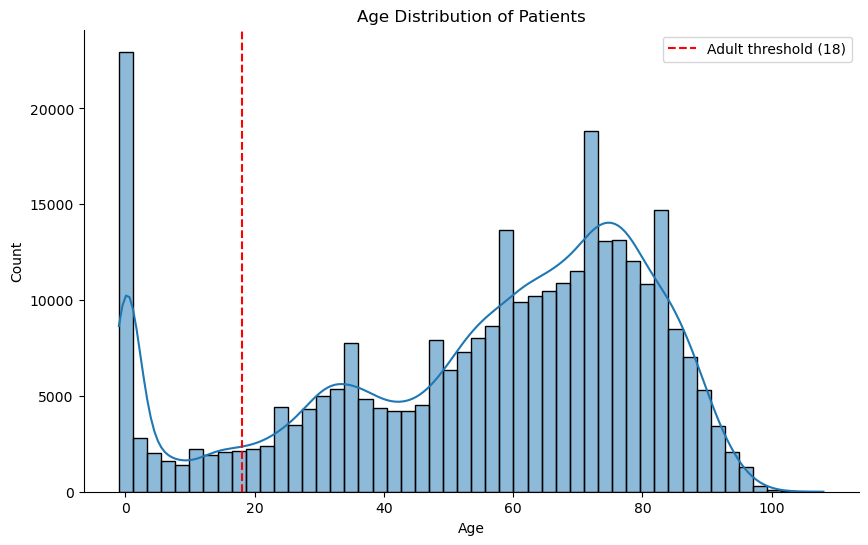

In [12]:
# Plot histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(clinical_data['age'], bins=50, kde=True)
plt.axvline(x=18, color='red', linestyle='--', label='Adult threshold (18)')
sns.despine()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients", fontweight="medium")
plt.legend()
plt.show()

In [13]:
# View cases with negative age
display(clinical_data[clinical_data['age'] < 0])

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis
48836,39934,337247,Entlassung,m,-1,4,P20.9


In [14]:
# Count cases with age = 0
len(clinical_data[clinical_data['age'] == 0])

20738

In [15]:
# View patients with age > 100
display(clinical_data[clinical_data['age'] > 100].sort_values(by='age'))

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis
269091,220736,108752,Verstorben,f,101,0,K63.1
182074,149457,43797,Entlassung,f,101,5,M80.95
172411,141436,204376,Entl.ext.Instit,f,101,4,S32.5
172410,141436,45079,Entl.ext.Instit,f,101,11,I50.01
156085,127900,309086,Entlassung,m,101,2,S32.5
153589,125831,64570,Entl.ext.Instit,f,101,9,E86
149044,122035,214105,Entl. in ex.KH,f,101,2,I63.4
139514,114322,209863,Verstorben,f,101,2,S72.01
226590,186342,22604,Entlassung,m,101,2,I70.24
109339,89584,233700,Entlassung,m,101,10,M10.96


In [16]:
# Keep only adult cases
clinical_data = clinical_data[clinical_data['age'] >= 18]

print(clinical_data['age'].describe())

count    273563.000000
mean         62.501036
std          18.712935
min          18.000000
25%          50.000000
50%          66.000000
75%          77.000000
max         108.000000
Name: age, dtype: float64


## 3.5 LOS distribution

In [17]:
print(clinical_data['length_of_stay_days'].describe())

count    273563.000000
mean          5.949909
std           7.605461
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max         524.000000
Name: length_of_stay_days, dtype: float64


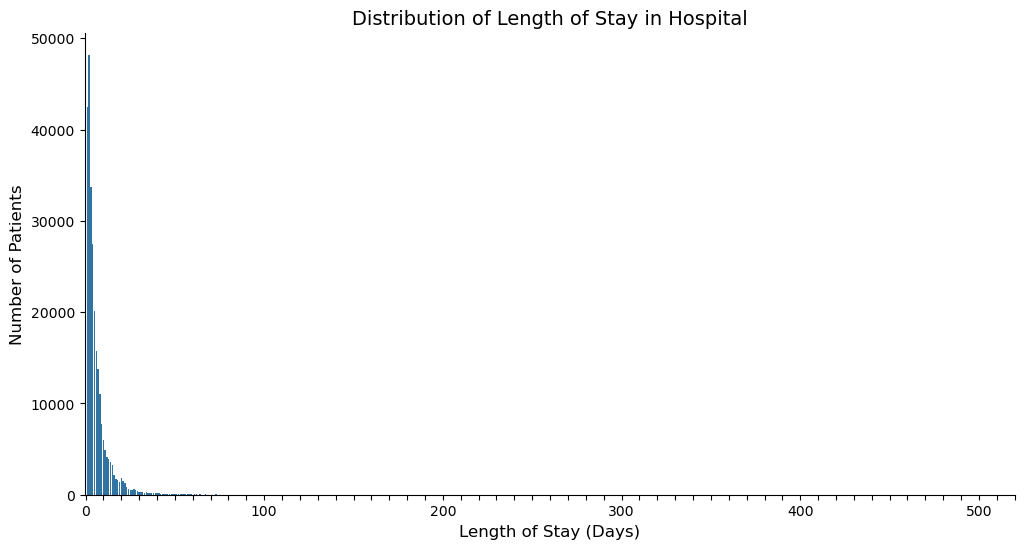

In [18]:
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=clinical_data['length_of_stay_days'].value_counts().index,  
            y=clinical_data['length_of_stay_days'].value_counts().values, 
            )

# Labels and title
plt.xlabel("Length of Stay (Days)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Distribution of Length of Stay in Hospital", fontsize=14, fontweight="medium")

# Define tick positions (every day)
tick_positions = range(0, clinical_data['length_of_stay_days'].max() + 1, 10)

# Define tick labels (empty for most, only show every 100 days)
tick_labels = [str(x) if x % 100 == 0 else "" for x in tick_positions]

# Apply ticks and labels
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=0)

# Remove top and right borders
sns.despine()

# Show plot
plt.show()


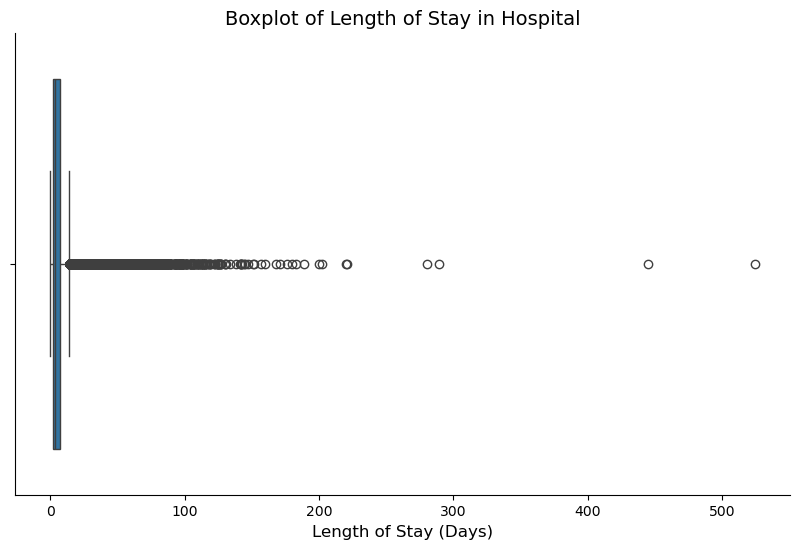

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=clinical_data['length_of_stay_days'])

# Labels and title
plt.xlabel("Length of Stay (Days)", fontsize=12)
plt.title("Boxplot of Length of Stay in Hospital", fontsize=14, fontweight="medium")

# Remove top and right borders
sns.despine()

# Show plot
plt.show()


In [20]:
clinical_data['length_of_stay_days'].max()

524

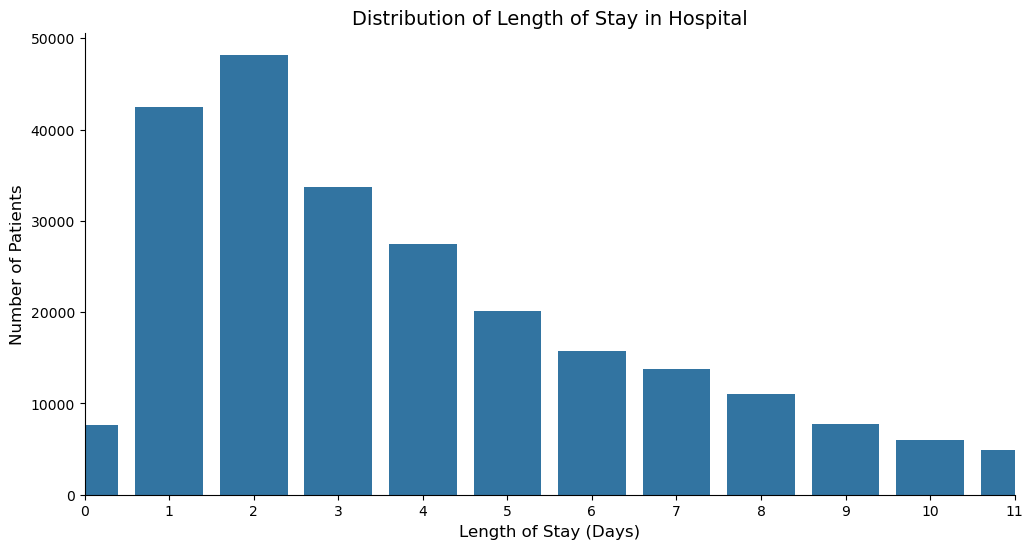

In [21]:
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=clinical_data['length_of_stay_days'].value_counts().index,  
            y=clinical_data['length_of_stay_days'].value_counts().values, 
            )

# Labels and title
plt.xlabel("Length of Stay (Days)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Distribution of Length of Stay in Hospital", fontsize=14, fontweight="medium")

# Define tick positions (every day)
tick_positions = range(0, clinical_data['length_of_stay_days'].max() + 1, 1)

# Apply ticks and labels
plt.xticks(ticks=tick_positions, rotation=0)

# Remove top and right borders
sns.despine()

plt.xlim(0, 11)

# Show plot
plt.show()

In [22]:
# View cases with LOS > 200
display(clinical_data[clinical_data['length_of_stay_days'] > 200].sort_values(by='length_of_stay_days'))

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis
119461,97850,27649,Besuch Krankh.,m,35,202,E71.3
271665,222989,352554,Verstorben,m,65,220,I35.0
280460,227968,417346,Entl.ext.Instit,f,43,221,I50.14
135981,111475,323216,Besuch Krankh.,m,33,280,E72.1
158295,129640,167686,Entl.ext.Instit,m,69,289,C20
122067,99997,298598,Verstorben,m,79,445,E43
254984,209359,150733,Entl.ext.Instit,m,54,524,Z04.8


## 3.6 Diagnosis

In [23]:
# Dictionary mapping ICD categories to their short names
icd_categories = {
    "I": "Infectious diseases",
    "II": "Neoplasms",
    "III": "Blood & immune disorders",
    "IV": "Endocrine & metabolic",
    "V": "Mental disorders",
    "VI": "Nervous system diseases",
    "VII": "Eye diseases",
    "VIII": "Ear diseases",
    "IX": "Circulatory diseases",
    "X": "Respiratory diseases",
    "XI": "Digestive diseases",
    "XII": "Skin diseases",
    "XIII": "Musculoskeletal diseases",
    "XIV": "Genitourinary diseases",
    "XV": "Pregnancy & childbirth",
    "XVI": "Perinatal conditions",
    "XVII": "Congenital disorders",
    "XVIII": "Symptoms & abnormal findings",
    "XIX": "Injury & poisoning",
    "XX": "External causes",
    "XXI": "Health factors & services",
    "XXII": "Special codes"
}

def categorize_icd(icd_code):
    """
    Assigns an ICD code to its main category based on the first character(s).
    """
    icd_code = str(icd_code).upper()  # Ensure it's a string and uppercase
    
    if icd_code.startswith(("A", "B")):
        return icd_categories["I"]
    elif icd_code.startswith(("C", "D0", "D1", "D2", "D3", "D4")):
        return icd_categories["II"]
    elif icd_code.startswith(("D5", "D6", "D7", "D8")):
        return icd_categories["III"]
    elif icd_code.startswith("E"):
        return icd_categories["IV"]
    elif icd_code.startswith("F"):
        return icd_categories["V"]
    elif icd_code.startswith("G"):
        return icd_categories["VI"]
    elif icd_code.startswith("H0") or icd_code.startswith("H1"):
        return icd_categories["VII"]
    elif icd_code.startswith(("H6", "H7")):
        return icd_categories["VIII"]
    elif icd_code.startswith(("I")):
        return icd_categories["IX"]
    elif icd_code.startswith(("J")):
        return icd_categories["X"]
    elif icd_code.startswith(("K")):
        return icd_categories["XI"]
    elif icd_code.startswith(("L")):
        return icd_categories["XII"]
    elif icd_code.startswith(("M")):
        return icd_categories["XIII"]
    elif icd_code.startswith(("N")):
        return icd_categories["XIV"]
    elif icd_code.startswith(("O")):
        return icd_categories["XV"]
    elif icd_code.startswith(("P")):
        return icd_categories["XVI"]
    elif icd_code.startswith(("Q")):
        return icd_categories["XVII"]
    elif icd_code.startswith(("R")):
        return icd_categories["XVIII"]
    elif icd_code.startswith(("S", "T")):
        return icd_categories["XIX"]
    elif icd_code.startswith(("V", "W", "X", "Y")):
        return icd_categories["XX"]
    elif icd_code.startswith(("Z")):
        return icd_categories["XXI"]
    elif icd_code.startswith(("U")):
        return icd_categories["XXII"]
    else:
        return "Unknown"

In [24]:
clinical_data['diagnosis_category'] = clinical_data['diagnosis'].apply(categorize_icd)

display(clinical_data)

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis,diagnosis_category
0,1,171465,Entlassung,f,73,28,A04.70,Infectious diseases
1,1,333396,Entlassung,f,73,34,K57.22,Digestive diseases
2,2,27091,Entlassung,m,51,13,T84.5,Injury & poisoning
3,2,36154,Entl.ext.Instit,m,50,12,I21.4,Circulatory diseases
4,2,142617,Entl. in ex.KH,m,51,1,T84.5,Injury & poisoning
...,...,...,...,...,...,...,...,...
311624,240988,393440,Entlassung,m,79,2,K55.21,Digestive diseases
311625,240988,412516,Entlassung,m,79,10,I11.00,Circulatory diseases
311626,240988,425806,Entl.ext.Instit,m,79,7,M16.7,Musculoskeletal diseases
311627,240989,393141,Entlassung,m,62,1,I49.3,Circulatory diseases


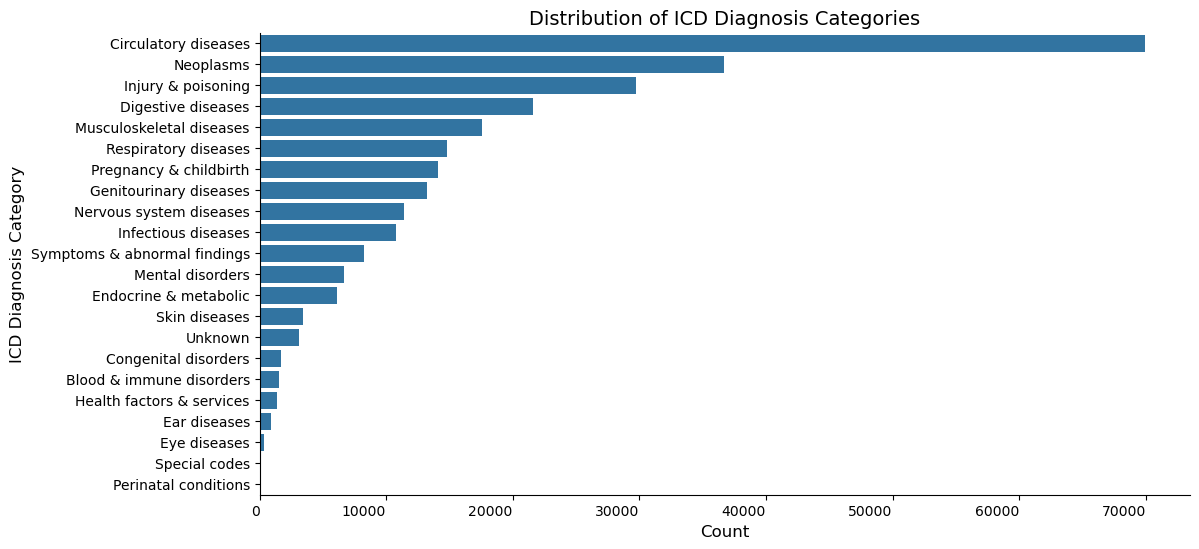

In [25]:
# Count occurrences of each diagnosis category
category_counts = clinical_data['diagnosis_category'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
sns.despine()
plt.xlabel("Count", fontsize=12, fontweight="normal")
plt.ylabel("ICD Diagnosis Category", fontsize=12, fontweight="normal")
plt.title("Distribution of ICD Diagnosis Categories", fontsize=14, fontweight="medium")
plt.xticks(rotation=0, ha="right")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

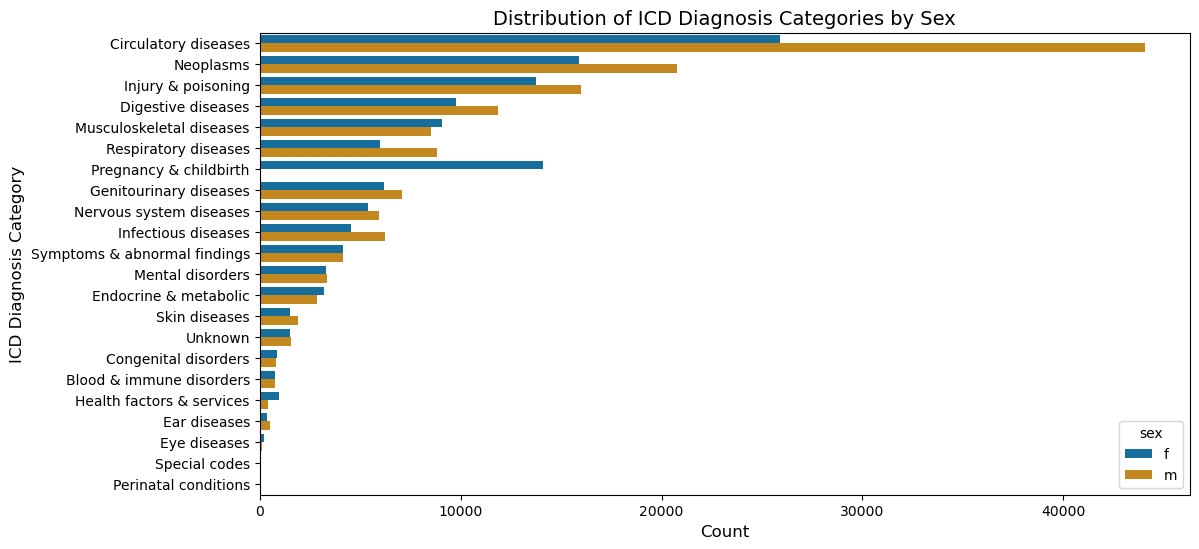

In [26]:
# Count occurrences of each diagnosis category by sex
category_sex_counts = clinical_data.groupby(["sex", "diagnosis_category"]).size().unstack(fill_value=0)

# Sort by the total count of each diagnosis category to maintain order as in the second plot
category_order = category_sex_counts.sum(axis=0).sort_values(ascending=False).index
sns.set_palette("colorblind")
sns.despine()
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='diagnosis_category', hue='sex', data=category_sex_counts.reset_index().melt(id_vars="sex", value_name="count", var_name="diagnosis_category"),
            order=category_order)
plt.xlabel("Count", fontsize=12, fontweight="normal")
plt.ylabel("ICD Diagnosis Category", fontsize=12, fontweight="normal")
plt.title("Distribution of ICD Diagnosis Categories by Sex", fontsize=14, fontweight="medium")
plt.show()


# 3. Save cleaned dataset

In [27]:
clinical_data.to_csv(clinical_output_path, index=False)